1. Develop yourself using numpy library:
- python function for implementation of gradient descent (GD) with momentum algorithm for the function of two variables f(x,y).
- python function for implementation of ADAM optimization algorithm for the function of two variables f(x,y).
2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).
3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N or in the form of 2D-plane graph.
4. Write a conclusions about the accuracy of the implemented algorithms.


https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display, Image

In [2]:
#1
# Gradient descent with momentum
#v(t) = beta*v(t-1)+(1-beta)*grad(t)
#w=w-lr*v(t)
def gd_momentum(grad, prev, lr, beta = 0.9, epsilon = 1e-5):
  i = 0;
  sequence = [prev]
  momentum = (1-beta) * grad(prev)
  next = prev - lr * momentum
  sequence.append(next)

  while abs((prev[0]+prev[1]) - (next[0]+next[1])) > epsilon:
    prev = next
    momentum = beta * momentum + (1-beta) * grad(prev)
    next = prev - lr * momentum
    i+=1
    sequence.append(next)

  return (next, sequence, i)

https://machinelearningmastery.com/adam-optimization-from-scratch/

In [3]:
#ADAM optimization
def adam(grad, prev, lr = 0.001, beta1 = 0.9 , beta2 = 0.999, epsilon = 1e-8):
  i = 0
  sequence = [prev]

  v = (1 - beta1) * grad(prev)
  s = (1 - beta2) * grad(prev)**2

  v_cor = v/(1-beta1)
  s_cor = s/(1-beta2)

  next = prev - lr * v_cor /(np.sqrt(s_cor)+epsilon)

  sequence.append(next)

  while abs((prev[0]+prev[1]) - (next[0]+next[1])) > epsilon:
    prev = next
    i+=1
    v = beta1 * v +(1 - beta1) * grad(prev)
    s = beta2 * s +(1 - beta2) * grad(prev)**2

    v_cor = v/(1-beta1**i)
    scor = s/(1-beta2**i)

    next = prev - lr * v_cor /(np.sqrt(s_cor) + epsilon)
    sequence.append(next)

  return (next,sequence, i)

In [4]:
#2
def f1(point):
    return 5*point[0]**2 + 7*point[1]**2 - point[0] + 3*point[1] + 13

def grad_f1(point):
    return np.array([10*point[0] - 1, 14*point[1] + 3])

In [5]:
x = np.arange(-2, 2, 0.05)
y = np.arange(-2,  2, 0.05)
x, y = np.meshgrid(x, y)
z1 = f1([x, y])

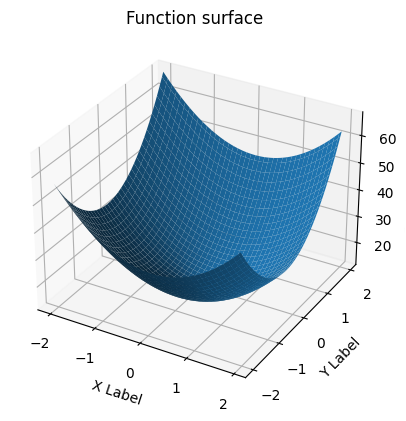

In [6]:
#function representation
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z1, vmin=z1.min())


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Function value')
plt.title("Function surface")


plt.show()

In [7]:
#3
# Apply gradient descent
grad_output = gd_momentum(grad_f1, prev=[2,2], lr = 0.001)
sequence_gd = grad_output[1]

print('min point: ', grad_output[0])
print('Minimal value of the func: ', f1(grad_output[0]))
print('Iterations: ', grad_output[2])

min point:  [ 0.1008506  -0.21426185]
Minimal value of the func:  12.628575050116948
Iterations:  699


In [8]:
# Apply ADAM
adam_output = adam(grad_f1, prev=[2,2])
sequence_adam = adam_output[1]

print('min point: ', adam_output[0])
print('Minimal value of the func: ', f1(adam_output[0]))
print('Iterations: ', adam_output[2])

min point:  [ 0.10000238 -0.21426645]
Minimal value of the func:  12.628571431196292
Iterations:  25687


In [9]:
# Visualization of the path
def planegraph(f, val, val1, Algorithm):
    X, Y = val
    X1, Y1 = val1
    Z = f(val)
    fig = go.Figure(data=go.Contour(z=Z, x=X, y=Y))
    fig.add_trace(go.Scatter(x=X1,
                             y=Y1,
                             mode='lines+markers',
                             line=dict(color="white")))
    fig.update_layout(title_text = Algorithm,
                      xaxis_title='x',
                      yaxis_title='y',
                      width=1000,
                      height=800)
    png_bytes = pio.to_image(fig, format="png")
    display(Image(png_bytes))

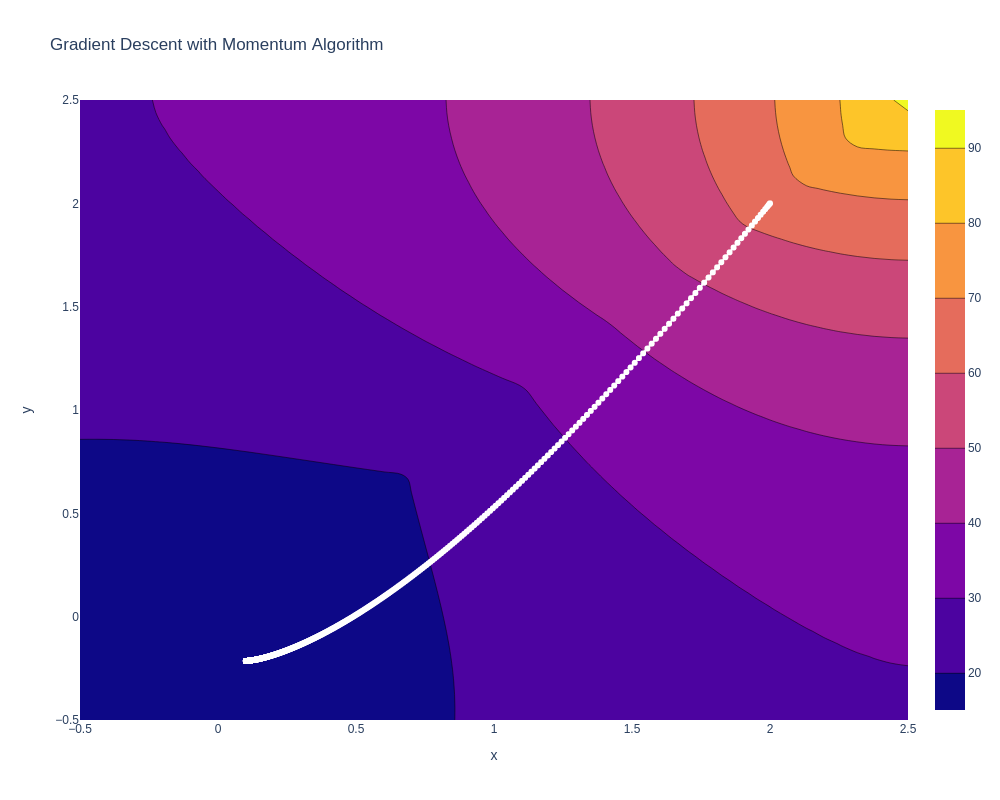

In [10]:
x1 = [item[0] for item in sequence_gd]
y1 = [item[1] for item in sequence_gd]
x2 = [item[0] for item in sequence_adam]
y2 = [item[1] for item in sequence_adam]
x = np.linspace(-0.5, 2.5)
y = np.linspace(-0.5, 2.5)
val=[x,y]
val_gd=[x1,y1]
val_adam=[x2,y2]

planegraph(f1, val, val_gd, "Gradient Descent with Momentum Algorithm")

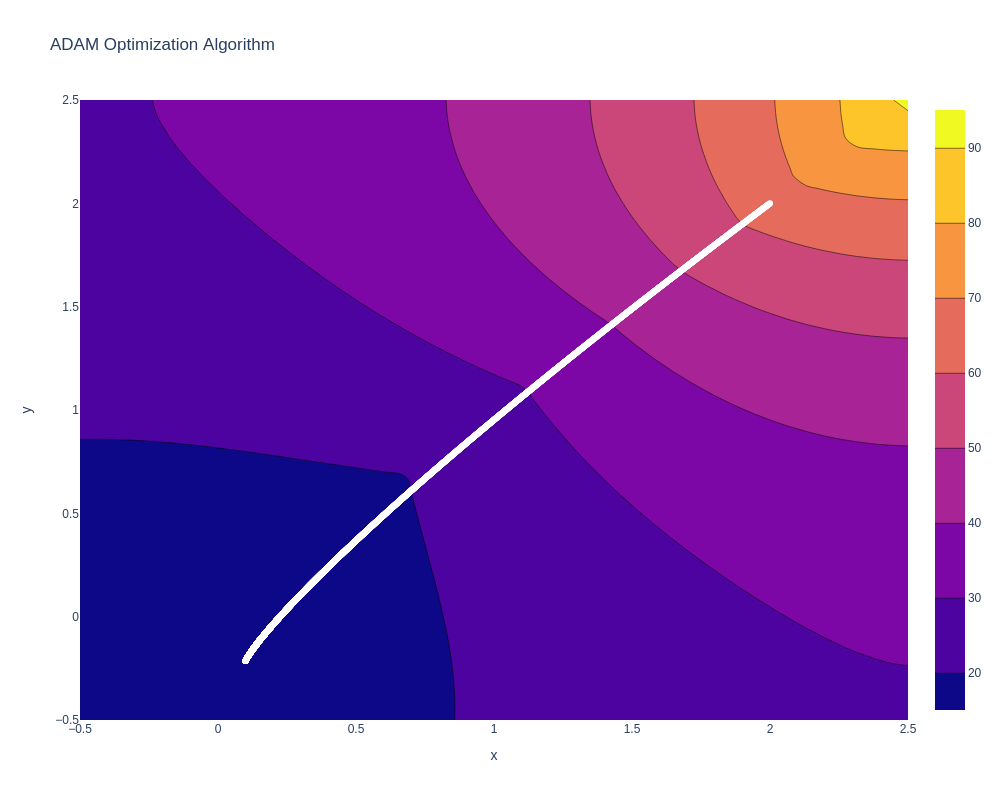

In [11]:
planegraph(f1, val, val_adam, "ADAM Optimization Algorithm")

**Conclusion:**
The results reveal that gradient descent with momentum required 699 iterations to converge to the minimum of the function, while Adam took significantly more, specifically 25,687 iterations, which is approximately 37 times as many. Despite the substantial difference in the number of iterations, both algorithms converged to almost the same precise minimum function value of 12.6285.

The variance in the number of iterations can be attributed to the fact that the Adam algorithm incorporates the use of decayed beta1(t) and beta2(t) parameters, which evolve over the course of the algorithm's iterations.